In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
df = pd.read_csv("../Data_logging/screenlog4.txt", sep="' ", header=None)

/usr/local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
df.columns = ("xl_x/g", "xl_y/g", "xl_z/g", "gr_x/dps", "gr_y/dps", "gr_z/dps", "mg_x/gauss", "mg_y/gauss", "mg_z/gauss")

In [5]:
df

,xl_x/g,xl_y/g,xl_z/g,gr_x/dps,gr_y/dps,gr_z/dps,mg_x/gauss,mg_y/gauss,mg_z/gauss
0,-0.002106,0.000158,0.001849,0.69625,-0.15375,-0.04750,-0.036247,0.096463,0.072201
1,0.003262,-0.002465,-0.001018,0.19750,0.03000,-0.00375,-0.036247,0.096755,0.082724
2,0.001920,-0.001733,0.000080,0.03125,-0.05750,-0.05625,-0.034201,0.096755,0.082724
3,0.001676,0.001561,-0.000347,-0.06500,0.01250,0.37250,-0.035077,0.098217,0.064163
4,0.001493,-0.000757,0.001361,0.12750,-0.03125,0.13625,-0.035077,0.094709,0.086524
...,...,...,...,...,...,...,...,...,...
2840,0.001188,-0.000696,-0.002543,-0.13500,0.03000,-0.05625,-0.038293,0.097340,0.086086
2841,-0.001008,0.001683,-0.001689,-0.18750,-0.05750,-0.12625,-0.038293,0.097340,0.086086
2842,0.002469,0.002110,0.002215,-0.03875,-0.17125,-0.17000,-0.031862,0.094125,0.082432
2843,0.014669,0.001439,-0.000835,-0.00375,-0.03125,-0.04750,-0.041216,0.099971,0.080532


In [23]:
def show_err_prior_calibration(col_name):
    data_to_plot = df[col_name].to_numpy()

    Q1 = np.percentile(data_to_plot, 30, interpolation = 'midpoint')
    Q3 = np.percentile(data_to_plot, 70, interpolation = 'midpoint')


    time_frame = np.linspace(0, len(data_to_plot), len(data_to_plot))/122.07
    #get the best fit line for error calibration
    a, b, c, d, e = np.polyfit(time_frame, data_to_plot, 4)

    plt.figure(figsize=(8, 5), dpi=200)
    plt.xlabel("time/sec")
    y_label = "magnetic field strength mg_x/gauss"
    title = "empty"
    color = "r"

    if (col_name[-5:] == "gauss"):
        y_label = "magnetic_field_strength " + col_name
        title = "magnetic_field_strength(gauss) vs. time(sec)"
        color = "blue"
    elif (col_name[-3:] == "dps"):
        y_label = "angular acceleration " + col_name
        title = "angular_acceleration(degree per sec) vs. time(sec)"
        color = "g"
    else:
        y_label = "linear acceleration " + col_name
        title = "linear_accelertion(g force) vs. time(sec)"
    
    plt.ylabel(y_label)
    plt.title(title)
    # plt.ylim(Q1, Q3)
    # plt.xlim(np.min(time_frame), np.max(time_frame))
    plt.scatter(time_frame, data_to_plot.T, marker="x", c=color)
    plt.plot(time_frame, a * time_frame**4 + b * time_frame**3 + c * time_frame**2 + d * time_frame**1 + e, color = "black")

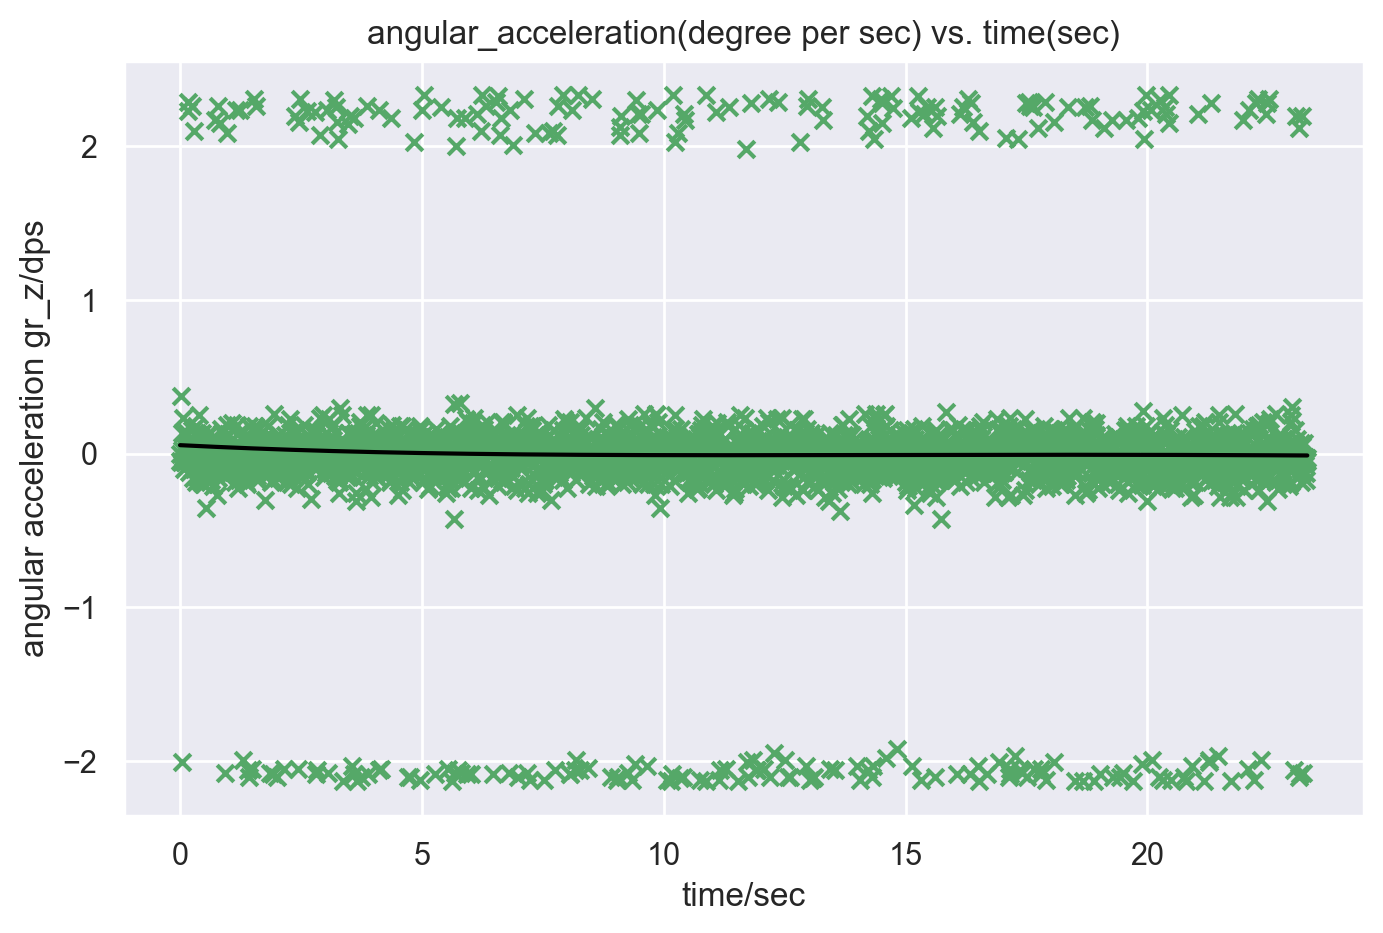

In [28]:
fig1 = show_err_prior_calibration("gr_z/dps")